# **PROBLEMA DE NEGOCIO**




---




## Una entidad gubernamental responsable de la gestión de la salud en Argentina y en Colombia enfrenta el desafío de comprender y analizar la propagación del COVID-19 para tomar decisiones informadas y eficaces en la gestión de la pandemia. <br> Como científicos de datos nuestra tarea será analizar los datos relacionados con el COVID-19 y presentar insight a través de visualizaciones.


# 1. Configuración del ambiente

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
import requests

# 2. Obtención, Tratamiento y Análisis Exploratorio (EDA)

### Cargando las bases de datos

In [5]:
df_covid = pd.read_csv(StringIO(requests.get("https://covid19.who.int/WHO-COVID-19-global-data.csv").text))
df_population = pd.read_excel('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/WPP2022_GEN_F01_DEMOGRAPHIC_INDICATORS_COMPACT_REV1.xlsx', sheet_name=0, skiprows=16)
df_population = df_population[df_population['Year'] == 2019]


*   **df_covid**: contiene información de la evolución de casos del covid19. Base de datos otorgada por W.H.O. (World Health Organization).
*   **df_population**: contiene información demográfica proporcionada por P.U.N. (Population United Nations)





### 2.1. EDA Base Covid World Health Organization

In [6]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51360 entries, 0 to 51359
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      51360 non-null  object 
 1   Country_code       49862 non-null  object 
 2   Country            50076 non-null  object 
 3   WHO_region         46224 non-null  object 
 4   New_cases          36717 non-null  float64
 5   Cumulative_cases   51360 non-null  int64  
 6   New_deaths         24257 non-null  float64
 7   Cumulative_deaths  51360 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.1+ MB


In [7]:
#from ast import Index
df_covid_limpio = df_covid.dropna(subset = ['Country_code'])
df_covid_limpio = df_covid_limpio[['Date_reported','Country_code','Country',
 'New_cases','Cumulative_cases','New_deaths','Cumulative_deaths']]
df_covid_limpio.fillna(0,inplace = True)

In [8]:
df_covid_limpio.isna().sum()

Date_reported        0
Country_code         0
Country              0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
dtype: int64

In [9]:
df_covid_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49862 entries, 0 to 51359
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      49862 non-null  object 
 1   Country_code       49862 non-null  object 
 2   Country            49862 non-null  object 
 3   New_cases          49862 non-null  float64
 4   Cumulative_cases   49862 non-null  int64  
 5   New_deaths         49862 non-null  float64
 6   Cumulative_deaths  49862 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 3.0+ MB


In [10]:
df_covid_limpio['Date_reported'] = pd.to_datetime(df_covid_limpio['Date_reported'])

In [11]:
df_covid_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49862 entries, 0 to 51359
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_reported      49862 non-null  datetime64[ns]
 1   Country_code       49862 non-null  object        
 2   Country            49862 non-null  object        
 3   New_cases          49862 non-null  float64       
 4   Cumulative_cases   49862 non-null  int64         
 5   New_deaths         49862 non-null  float64       
 6   Cumulative_deaths  49862 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 3.0+ MB


In [12]:
df_covid_limpio[['New_cases','New_deaths']] = df_covid_limpio[['New_cases','New_deaths']].astype('int64')

In [13]:
df_covid_limpio['lethality_rate'] = ((df_covid_limpio['Cumulative_deaths'])/(df_covid_limpio['Cumulative_cases'])) * 100

In [14]:
df_covid_limpio['lethality_rate'].fillna(0, inplace=True)

In [18]:
df_covid_limpio['lethality_rate'].describe()

c:\Users\Pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    4.986200e+04
mean              inf
std               NaN
min      0.000000e+00
25%      3.349894e-01
50%      1.051938e+00
75%      2.046970e+00
max               inf
Name: lethality_rate, dtype: float64

Observamos a través de los estadísticos que la columna tiene valores anómalos. Vamos a graficar y ver como solucionarlo

<Axes: >

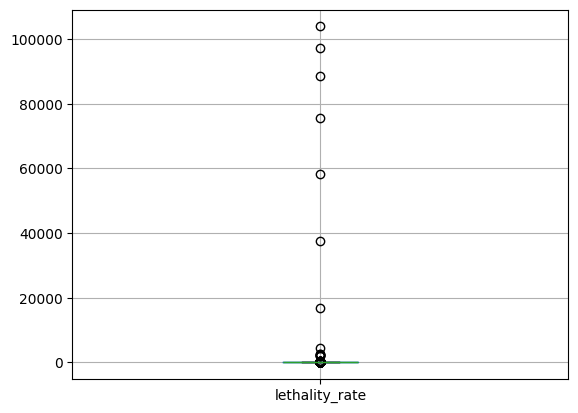

In [12]:
df_covid_limpio.boxplot(column=['lethality_rate'])

In [13]:
centiles = df_covid_limpio.lethality_rate.quantile([i/100 for i in range(1,100)])
centiles

0.01     0.000000
0.02     0.000000
0.03     0.000000
0.04     0.000000
0.05     0.000000
          ...    
0.95     5.000000
0.96     5.650517
0.97     6.460209
0.98     7.928402
0.99    12.260898
Name: lethality_rate, Length: 99, dtype: float64

In [14]:
df_covid_limpio.shape

(49396, 8)

In [15]:
df_covid_limpio = df_covid_limpio[df_covid_limpio['lethality_rate'] <= centiles[0.99]]

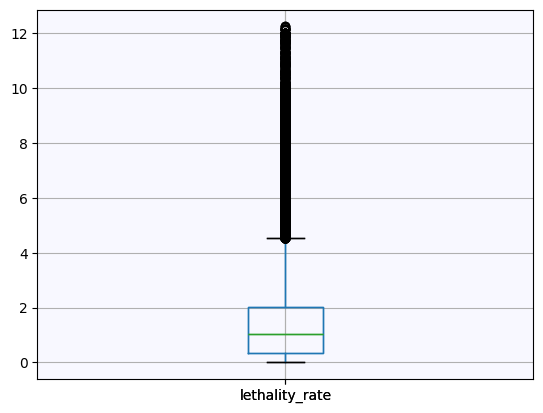

In [77]:
df_covid_limpio.boxplot(column=['lethality_rate'])
plt.show()

In [17]:
df_covid_limpio.describe()

,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
count,48902,4.890200e+04,4.890200e+04,48902.000000,4.890200e+04,48902.000000
mean,2022-01-15 22:05:48.353850624,1.578961e+04,1.659527e+06,138.018609,1.938730e+04,1.452976
min,2020-01-05 00:00:00,-6.507900e+04,0.000000e+00,-3432.000000,0.000000e+00,0.000000
25%,2021-01-10 00:00:00,0.000000e+00,3.904000e+03,0.000000,2.900000e+01,0.326607
50%,2022-01-16 00:00:00,1.030000e+02,4.379300e+04,0.000000,4.710000e+02,1.029184
75%,2023-01-22 00:00:00,2.005750e+03,5.070115e+05,20.000000,6.637750e+03,2.004507
max,2024-01-21 00:00:00,4.047548e+07,1.034368e+08,47687.000000,1.165780e+06,12.260536
std,NaN,2.420378e+05,7.309166e+06,867.312807,7.947323e+04,1.625929


#### Exportamos los datos

In [83]:
df_covid_limpio.to_csv('covid_clean.csv', sep=';', index=False)

### 2.2. EDA Base Population United Nations (información demográfica)

#### 1.1. Creamos una copia de df_population y nos quedamos con aquellas columnas de interés.


In [18]:
df_population_limpio = df_population[['ISO2 Alpha-code','Total Population, as of 1 July (thousands)','Male Population, as of 1 July (thousands)','Female Population, as of 1 July (thousands)','Population Density, as of 1 July (persons per square km)','Life Expectancy at Birth, both sexes (years)']].copy()
df_population_limpio.info()


<class 'pandas.core.frame.DataFrame'>
Index: 286 entries, 69 to 20593
Data columns (total 6 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   ISO2 Alpha-code                                           236 non-null    object
 1   Total Population, as of 1 July (thousands)                286 non-null    object
 2   Male Population, as of 1 July (thousands)                 286 non-null    object
 3   Female Population, as of 1 July (thousands)               286 non-null    object
 4   Population Density, as of 1 July (persons per square km)  286 non-null    object
 5   Life Expectancy at Birth, both sexes (years)              286 non-null    object
dtypes: object(6)
memory usage: 15.6+ KB


#### 1.2. Renombramos las columnas para mejor compresión de su información

In [19]:
df_population_limpio = df_population_limpio.rename(columns={
    'ISO2 Alpha-code': 'Country_code',
    'Total Population, as of 1 July (thousands)': 'Total_Population',
    'Male Population, as of 1 July (thousands)': 'Male_Population',
    'Female Population, as of 1 July (thousands)': 'Female_Population',
    'Population Density, as of 1 July (persons per square km)': 'Population_Density',
    'Life Expectancy at Birth, both sexes (years)': 'Life_Expectancy'
})
df_population_limpio.info()


<class 'pandas.core.frame.DataFrame'>
Index: 286 entries, 69 to 20593
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country_code        236 non-null    object
 1   Total_Population    286 non-null    object
 2   Male_Population     286 non-null    object
 3   Female_Population   286 non-null    object
 4   Population_Density  286 non-null    object
 5   Life_Expectancy     286 non-null    object
dtypes: object(6)
memory usage: 15.6+ KB


#### 1.3. Eliminamos registros nulos

In [20]:
#Verificar registros nulos (antes de eliminarlos)
df_population_limpio.isna().sum()

Country_code          50
Total_Population       0
Male_Population        0
Female_Population      0
Population_Density     0
Life_Expectancy        0
dtype: int64

In [21]:
#Eliminar todos los registros nulos
df_population_limpio.dropna(inplace=True)
df_population_limpio.isna().sum()

Country_code          0
Total_Population      0
Male_Population       0
Female_Population     0
Population_Density    0
Life_Expectancy       0
dtype: int64

#### 1.4. Formateamos las estructuras de datos

In [22]:
#Requerimos convertir las columnas 1 a la 5 en INT
df_population_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236 entries, 1801 to 20593
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country_code        236 non-null    object
 1   Total_Population    236 non-null    object
 2   Male_Population     236 non-null    object
 3   Female_Population   236 non-null    object
 4   Population_Density  236 non-null    object
 5   Life_Expectancy     236 non-null    object
dtypes: object(6)
memory usage: 12.9+ KB


In [23]:
#Observamos que tenemos decimales, por lo que deberíamos redondearlos previamente para su conversión
df_population_limpio.head()

,Country_code,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
1801,BI,11874.838,5894.278,5980.56,457.605,62.351
1873,KM,790.986,397.126,393.86,425.033,64.068
1945,DJ,1073.994,533.626,540.367,46.333,63.085
2017,ER,3498.818,1724.86,1773.958,28.881,67.3
2089,ET,114120.594,57375.433,56745.161,114.121,65.838


In [24]:
#Primero la convertimos a float (las columnas comentadas dan un error)
df_population_limpio = df_population_limpio.astype({
  'Total_Population': 'float',
  # 'Male_Population': 'float',
  # 'Female_Population': 'float',
  'Population_Density': 'float',
  # 'Life_Expectancy': 'float'
})
df_population_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236 entries, 1801 to 20593
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country_code        236 non-null    object 
 1   Total_Population    236 non-null    float64
 2   Male_Population     236 non-null    object 
 3   Female_Population   236 non-null    object 
 4   Population_Density  236 non-null    float64
 5   Life_Expectancy     236 non-null    object 
dtypes: float64(2), object(4)
memory usage: 12.9+ KB


In [25]:
#Detectamos que existen errores tipográficos que no pueden ser convertidos directamente en floats
criterio = df_population_limpio['Male_Population'] == '...'
df_population_limpio[criterio]

,Country_code,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
12817,VA,0.528,...,...,1200.0,...


In [26]:
#Aplicamos una conversión utilizando el método de pandas to_numeric() que nos provee manejo de éste tipo de errores
#El parámetro errors, indica qué hacer en caso de encontrar un valor no numérico. El valor coerce, reemplazará los strings no identificados como números por NaN

df_population_limpio['Male_Population'] = pd.to_numeric(df_population_limpio['Male_Population'], errors='coerce')
df_population_limpio['Female_Population'] = pd.to_numeric(df_population_limpio['Female_Population'], errors='coerce')
df_population_limpio['Life_Expectancy'] = pd.to_numeric(df_population_limpio['Life_Expectancy'], errors='coerce')

df_population_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236 entries, 1801 to 20593
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country_code        236 non-null    object 
 1   Total_Population    236 non-null    float64
 2   Male_Population     235 non-null    float64
 3   Female_Population   235 non-null    float64
 4   Population_Density  236 non-null    float64
 5   Life_Expectancy     235 non-null    float64
dtypes: float64(5), object(1)
memory usage: 12.9+ KB


In [27]:
#Verificamos cuántos NaN tenemos resultado del tratamiento
df_population_limpio.isna().sum()

Country_code          0
Total_Population      0
Male_Population       1
Female_Population     1
Population_Density    0
Life_Expectancy       1
dtype: int64

In [28]:
#Eliminamos los NaN
df_population_limpio.dropna(inplace=True)
df_population_limpio.isna().sum()

Country_code          0
Total_Population      0
Male_Population       0
Female_Population     0
Population_Density    0
Life_Expectancy       0
dtype: int64

In [29]:
df_population_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235 entries, 1801 to 20593
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country_code        235 non-null    object 
 1   Total_Population    235 non-null    float64
 2   Male_Population     235 non-null    float64
 3   Female_Population   235 non-null    float64
 4   Population_Density  235 non-null    float64
 5   Life_Expectancy     235 non-null    float64
dtypes: float64(5), object(1)
memory usage: 12.9+ KB


In [30]:
#Redondeamos los valores para arriba y convertimos en enteros
df_population_limpio['Total_Population'] = df_population_limpio['Total_Population'].round(0).astype('int64')
df_population_limpio['Male_Population'] = df_population_limpio['Male_Population'].round(0).astype('int64')
df_population_limpio['Female_Population'] = df_population_limpio['Female_Population'].round(0).astype('int64')
df_population_limpio['Population_Density'] = df_population_limpio['Population_Density'].round(0).astype('int64')
df_population_limpio['Life_Expectancy'] = df_population_limpio['Life_Expectancy'].round(0).astype('int64')

df_population_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235 entries, 1801 to 20593
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country_code        235 non-null    object
 1   Total_Population    235 non-null    int64 
 2   Male_Population     235 non-null    int64 
 3   Female_Population   235 non-null    int64 
 4   Population_Density  235 non-null    int64 
 5   Life_Expectancy     235 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 12.9+ KB


In [31]:
df_population_limpio.head()

,Country_code,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
1801,BI,11875,5894,5981,458,62
1873,KM,791,397,394,425,64
1945,DJ,1074,534,540,46,63
2017,ER,3499,1725,1774,29,67
2089,ET,114121,57375,56745,114,66


#### 1.5. Multiplicamos por 1000 las columnas 'Total_Population', 'Male_Population' y 'Female_Population'

In [32]:
df_population_limpio[['Total_Population','Male_Population','Female_Population']] = df_population_limpio[['Total_Population','Male_Population','Female_Population']]*1000
df_population_limpio.head()

,Country_code,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
1801,BI,11875000,5894000,5981000,458,62
1873,KM,791000,397000,394000,425,64
1945,DJ,1074000,534000,540000,46,63
2017,ER,3499000,1725000,1774000,29,67
2089,ET,114121000,57375000,56745000,114,66


#### 1.6. Eliminar todos los registros nulos

In [33]:
#No contamos con registros nulos porque ya los tratamos ni bien los identficamos
df_population_limpio.isna().sum()

Country_code          0
Total_Population      0
Male_Population       0
Female_Population     0
Population_Density    0
Life_Expectancy       0
dtype: int64

#### 1.7. Reiniciamos los índices

In [34]:
df_population_limpio.reset_index(inplace=True, drop=True)
df_population_limpio.head()

,Country_code,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
0,BI,11875000,5894000,5981000,458,62
1,KM,791000,397000,394000,425,64
2,DJ,1074000,534000,540000,46,63
3,ER,3499000,1725000,1774000,29,67
4,ET,114121000,57375000,56745000,114,66


In [82]:
df_population_limpio.to_csv('population_clean.csv', sep=';', index=False)